# Self-Organizing Maps (redes de Kohonen)

Alrededor de los años 80, cuando estaba surgiendo el algoritmo de backpropagation para el entrenamiento de redes neuronales, surgió una nueva topología de red neuronal. Esta nueva topología se inspira en la forma como el cerebro organiza zonas de procesamiento que se encuentran localizadas en una misma región, o regiones cercanas.

## Arquitectura de las redes de Kohonen.

La estructura de la red de kohonen se puede observar en la siguiente figura:


<img src="img/kohonen1.gif" width="400">

La red neuronal ubica sus neuronas en un lattice (enrejado) que puede ser de dimensión 1 o 2. Este lattice representa la ubicación de las unidades neuronales. 

Aquí se tiene una capa de entrada, que consiste en los vectores $\mathbf{x}_k\in\mathbb{R}^m$, donde $m$ representa el número de características que contiene el vector, $k$ representa la observación $k$-ésima, con $k=\{1,2,\ldots,N\}$, y $N$ el número de observaciones. Este vector de entrada esta conectado a todas las unidades neuronales que conforman la capa de salida de la red (capa de Kohonen), por medio de un vector de pesos $\boldsymbol\omega_i$. De forma matricial, si suponemos que todas las observaciones se encuentran en una matriz $\mathbf{X} \in \mathbb{R}^{N\times m}$, entonces la matriz de pesos tendría las dimensiones $\mathbf{W} \in \mathbb{R}^{m\times n}$, con $n$ el número de neuronas en la capa de Kohonen.

De esta forma la salida total de la red estaria dada por:

$$\mathbf{Y}=\mathbf{X}\mathbf{W},$$

es decir se esta haciendo un mapeo de datos que se encuentran en $\mathbb{R}^m$, a datos en $\mathbb{R}^n$, si $n<m$ se logra tener reducción de dimensionalidad.

## Principio de Funcionamiento de un SOM

La idea detrás del funcionamiento de los mapas auto-organizados es poder utilizar aprendizaje no supervisado para tener una idea de como es la estructura de los datos que se usan en entrenamiento. 

Para lograr esto, las redes de Kohonen lo que hacen es aplicar un algoritmo competitivo para identificar que unidades neuronales son más parecidas a la entrada. Luego de esto, aplican un algoritmo colaborativo para identificar unidades neuronales cercanas. Y finalmente, realizan una actualización de los pesos de tal forma que, se actualizan los pesos de la unidad neuronal más cercana y sus vecinos. Esto se puede resumir en los siguientes pasos:

1. **Competencia**: Se busca la unidad neuronal $i$ cuyos pesos $\boldsymbol\omega_i$ se parecen más a la entrada $\mathbf{x}_j$, esto se puede lograr mediante la búsqueda de la unidad neuronal con la distancia mínima entre sus pesos y la entrada, o la unidad que maximiza el producto punto entre sus pesos y la entrada:

$$\min_{i}||\mathbf{x}_j-\boldsymbol\omega_i||_2,$$

o

$$\max_{i}\mathbf{x}_j^T\boldsymbol\omega_i.$$


2. **Colaboración:** Se identifican las neuronas cercanas a la neurona $i$, para esto primero utilizaremos una medida de distancia euclidiana entre los pesos de las unidades neuronales $d(i,k)=||\boldsymbol\omega_i-\boldsymbol\omega_k||_2$. Normalizamos esta distancia utilizando una *Radial basis function* (RBF) para definir que tan cercana es una unidad neuronal a otra:

$$h(i,j) = \exp{\left(-\frac{d(i,j)}{2\sigma^2}\right)}.$$

Esta unidad de medida tiende a $1$ para neuronas cercanas y tiende a cero para neuronas lejanas. $\sigma^2$ es un parámetro que controla la definición de cercano o lejano. Esta distancia se denomina la distancia lateral entre neuronas.

Es importante notar que al principio se quiere que hayan muchos cambios en la red, para poder darle flexibilidad en su aprendizaje, pero a medida que los datos se van presentando, las regiones del mapa deberían especializarse. Para controlar esto, se puede hacer que el valor de la desviación estándar de la función RBF cambie con el tiempo, es decir que, tenga la forma:

$$\sigma(t)=\sigma_0 \exp \left(-\frac{t}{T}\right),$$

donde $t$ me representa el *epoch* del entrenamiento, y $T$ es una constante. Esto garantiza que al principio se tenga un vecindario grande, pero a medida que van pasando los *epochs* este vecindario se va haciendo más pequeño, lo que hace que ciertas regiones se especialicen en cierto conjunto de datos.

3. **Aprendizaje (actualización de los pesos):** inicialmente partimos de unos pesos aleatorios, y estos se actualizan, de tal forma que, para neuronas cuyos pesos sean similares al vector de entrada se fortalezca esa conexión, y para unidades neuronales con pesos alejados del vector se penalice la actualización. Esta formula esta dada por:

$$\boldsymbol\omega_j(t+1)=\boldsymbol\omega_j(t)+\Delta\boldsymbol\omega_j(t).$$

Esta fórmula es muy parecida a la que se encontró para el gradiente descendiente, y  en general para los modelos de aprendizaje que se han estudiado. Aquí es donde ocurre el aprendizaje. En este caso, el valor de $\Delta\boldsymbol\omega_j(t)$ esta dado por:

$$\Delta\boldsymbol\omega_j(t)=\eta(t)h_{(i,j)}(t)(\mathbf{x}-\boldsymbol\omega_j),$$

donde $i$ representa la unidad neuronal más parecida a $\mathbf{x}$; $h_{(i,j)}(t) = \exp{\left(-\frac{d(i,j)}{2\sigma(t)^2}\right)}$; y $\eta(t) = \eta_0e^{-\frac{t}{T_2}}$, siendo $T_2$ una constante. En otras palabras,la tasa de aprendizaje también decrece con el tiempo. El decrecer la tasa de aprendizaje con el tiempo evita que la red neuronal tenga cambios abruptos una vez su estructura ha convergido.

Normalmente se puede seleccionar como valores $\eta_0=0.1$, $T_2=1000$, y $T = \frac{1000}{log(\sigma_0)}$, con $\sigma_0$ muy grande al comienzo.

## Consideraciones de las Redes de Kohonen

1. **Convergencia:** Estas redes toman mucho tiempo en entrenar, el número de *epochs* de entrenamiento está al rededor de los miles de iteraciones. Generalmente, una regla empírica es utilizar algunos miles del número de unidades neuronales.


2. **Training Stopping:** Existen muchos criterios de parada que se pueden usar solos o una combinación de ellos. Entre estos criterios tenemos:
    * No hay un cambio notable en la actualización de los pesos. Es decir que, los $\Delta\boldsymbol\omega_j$ son muy pequeños.
    * No hay un cambio notable en el mapa de características (feature map, capa de kohonen)
  
  
3. **Problemas:** Existen algunos problemas inherentes con las redes de Kohonen:
    * Toma demasiado tiempo en converger.
    * Puede tener diferentes resultados en la convergencia.

## SOM en la práctica

Los SOM se pueden utilizar en una gran variedad de aplicaciones. Para entender un poco mejor el SOM veámoslos desde punto de vista de un algoritmo de clustering como k-means.

Para este análisis estamos más interesados en los pesos de las unidades neuronales que en la salida de las mismas. De esta forma, podemos decir que los pesos de las unidades neuronales representan los centroides de $n$ clusters donde están ubicados los datos.  Así, debido al criterio de vecindad utilizado en su entrenamiento, las unidades neuronales cercanas entre si (centroides de clusters cercanos) se van a agrupar muy cerca la una de la otra, definiendo las características del agrupamiento. En este sentido, los SOM pueden particionar el espacio donde se encuentran los datos en regiones de elementos similares, **sin determinar cuantos clusters deben haber**.

Por otro lado, se puede definir lo que se conoce como un **hit map**. Este mapa representa un conteo que determina cuantas veces esa unidad neuronal fue seleccionada como la unidad más parecida a un dato de entrada (BMU-Best Matching Unit). Varias observaciones de entrada pueden ser mapeadas a una misma unidad neuronal. Por lo tanto en primer lugar, esto me genera una reducción en la cantidad de observaciones, esto es útil en caso de querer realizar una reducción de numero de observaciones para entrenar un modelo. En segundo lugar, esto también me permite generar en el mapa de características una imagen de que regiones de la red están siendo activadas para elementos que son comunes. Al agrupar estos elementos y asignarles una etiqueta se pueden identificar regiones de unidades neuronales que identifican un conjunto de elementos en particular. Esto se parece mucho a la forma como el cerebro procesa la información.

También, se puede analizar  para cada cluster identificado, la contribución de cada uno de los pesos (su magnitud) en la salida de la red. De esta forma, se pueden identificar que características (features) de los datos de entrada son más relevantes para determinar los elementos que pertenecen a un cluster. **Esto sirve para realizar una selección de características**.

Se puede analizar como se distribuyen los clusters entre cada grupo, analizando como es la distancia entre los pesos de una unidad neuronal y el peso de sus vecinos. De esta forma, se puede lograr ver que tan parecidos son las unidades neuronales que conforman un cluster, y que tan bien separados están de los demás clusters. **Esta representación  puede dar una idea en dos dimensiones de como están organizados los datos en $N$ dimensiones**. 

Finalmente, si tomamos en cuenta la salida de la red como un elemento en $\mathbb{R}^{n}$, si los datos de entrada están mapeados en $\mathbb{R}^{N}$, y si $n<N$ entonces se tiene que los SOM permiten realizar una reducción de dimensionalidad conservando las características topológicas de los datos de entrada, a diferencia de PCA. Esto significa que **los SOM van a agrupar elementos que están cercanos entre si en un espacio de dimensión $N$ a elementos cercanos entre si en un espacio de dimensión menor, $n$**.

## Ejemplos:

### Fitting a distribution

Las SOM pueden utilizarse para hacer un muestreo de la distribución de datos [aquí](https://www.youtube.com/watch?v=QvI6L-KqsT4) pueden ver un ejemplo. Otro [aquí](https://www.youtube.com/watch?v=k7DK5fnJH94).

### Mapeo de Formas

LAs SOM pueden utilizarse para realizar un mapeo de contornos. Un ejemplo se puede ver [aquí](https://www.youtube.com/watch?v=ipH_Df2MbPI). Otro ejemplo esta [aquí](https://www.youtube.com/watch?v=4FqkhiQcblc). Aplicado al Traveling Salesman Problem [aquí](https://www.youtube.com/watch?v=wT9rEi9dY8M). 

### Cuantización de Color

Se puede utilizar también para hacer una mejor selección de paleta de colores para representar una imagen a color. Un ejemplo se puede ver [aquí](https://www.youtube.com/watch?v=ZCDF9f1Wo0Q).

## Encontrar correlaciones entre los datos

Se muestran los pesos correspondientes a cada parametro de entrada (feature) y esto produce una imagen que se puede identificar como un mapa de calor. De esta forma se puede determinar si hay features similares entre si. Estos se denominan *component planes*, un ejemplo se puede ver [aquí](https://youtu.be/K4WuE7zlOZo?t=531).


## Implementación de SOMs en python

Hay varias librerías que implementan SOM en python, destaco las siguientes, cada una con sus ventajas:

- [SOMPY](https://github.com/sevamoo/SOMPY): se parace mucho al toolbox de MATLAB con salidas similares. Es una librería que hace años no se actualiza. Topología rectangular.
- [sklearn-som](https://pypi.org/project/sklearn-som/): librería muy compatible con scikit-learn, pero algo limitada al potencial de SOM. Topología rectangular. Está recientemente actualizada.
- [MiniSom](https://github.com/JustGlowing/minisom): **es la librería que recomiendo**. Está actualizada, es muy versátil, tiene muchos ejemplos, permite topología rectangular y hexagonal, es sencilla. No tiene buena documentación explícita, pero si miran el script de [minison.py](https://github.com/JustGlowing/minisom/blob/master/minisom.py), encontraran buenos comentarios describiendo cada función.

### Simple ejemplo en MiniSom

In [1]:
#Instalacion
# !pip install minisom

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom

Esta es una demostración de cómo un mapa autoorganizado (SOM), se puede utilizar para mapear datos de alta dimensión en una representación bidimensional. En aras de una visualización fácil, "de alta dimensión", en este caso, es 3D.

En general, los SOM pueden ser útiles para visualizar datos de alta dimensión en términos de su estructura de similitud. Se sabe que los SOM especialmente grandes (es decir, con una gran cantidad de unidades Kohonen) realizan asignaciones que preservan la topología de los datos originales, es decir, los puntos de datos vecinos en el espacio de entrada también se representarán en ubicaciones adyacentes en el SOM.

El siguiente código muestra el ejemplo de mapeo de color "clásico", es decir, el SOM mapeará varios colores en un área rectangular.

In [2]:
colors = np.array(
         [[0., 0., 0.],
          [0., 0., 1.],
          [0., 0., 0.5],
          [0.125, 0.529, 1.0],
          [0.33, 0.4, 0.67],
          [0.6, 0.5, 1.0],
          [0., 1., 0.],
          [1., 0., 0.],
          [0., 1., 1.],
          [1., 0., 1.],
          [1., 1., 0.],
          [1., 1., 1.],
          [.33, .33, .33],
          [.5, .5, .5],
          [.66, .66, .66]])

# nombres de colores para visualizacion
color_names = \
        ['black', 'blue', 'darkblue', 'skyblue',
         'greyblue', 'lilac', 'green', 'red',
         'cyan', 'violet', 'yellow', 'white',
         'darkgrey', 'mediumgrey', 'lightgrey']

In [3]:
som = MiniSom(20, 30, 3, learning_rate=0.5, sigma = 2)

In [4]:
som.random_weights_init(colors)
som.train_batch(colors,10000)

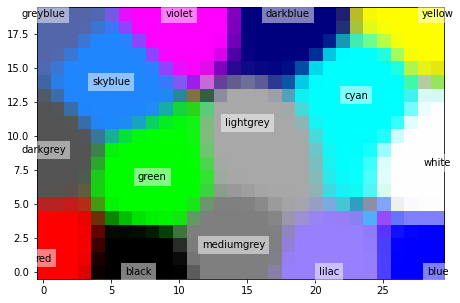

In [14]:
plt.figure(1, figsize=(7.5, 5), frameon=False)
for ix in range(len(colors)):
    winner = som.winner(colors[ix])
    plt.text(winner[1], winner[0], color_names[ix], ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.5, lw=0))
plt.imshow(som.get_weights(), origin='lower')
# plt.savefig(’L6-colors.png’,dpi=300)
# plt.close()

# Referencias

- Kohonen, T., 1990. The self-organizing map. Proceedings of the IEEE, 78(9), pp.1464-1480.
- Vesanto, J. and Alhoniemi, E., 2000. Clustering of the self-organizing map. IEEE Transactions on neural networks, 11(3), pp.586-600.
- https://sites.astro.caltech.edu/~george/aybi199/OldLectures/Lec13_Donalek.pdf
- https://stackoverflow.com/questions/13631673/how-do-i-make-a-u-matrix